# assignment 1. Yang Yinfang


In [1]:
import nltk
import matplotlib
import re

from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/rheayang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Building corpora with Reddit

Scraping reddit data with PRAW. 

In [2]:
pip install praw

Note: you may need to restart the kernel to use updated packages.


8 subreddits

Art and Design (r/art, r/design), 
Gaming and PS4 (r/gaming, r/PS4), 
Ireland and Italy (r/ireland, r/england), 
Science and Technology (r/science, r/technology).

In [96]:
ci = "0QDswxUBGmnGPHKxk3MDTQ" #your client id
cs = "0hIqCk19gHUzi6MSVgRd22qqVtm2EA" #your client secret
ua = "russia1" #your user agent name
sub = "england" #the name of the subreddit (not including the 'r/')

In [97]:
import praw
from praw.models import MoreComments

reddit = praw.Reddit(
    client_id=ci,
    client_secret=cs,
    user_agent=ua
)

with open(sub+".txt", "w") as f:
    
    #on the following line you can change top to any of the previously mentioned ways of sorting 
    #and the limit to however many posts you would like to extract (here we extract just 10).
    for post in reddit.subreddit(sub).top(limit=10): 
        
        #this line collects the post titles
        f.write(post.title+"\n")
        
        #this line collects the post content
        f.write(post.selftext+"\n")
        
        #this section collects the comments
        for comment in post.comments:
            if isinstance(comment, MoreComments):
                continue
            f.write(comment.body+"\n")

### Loading the corpora.txt files
### For a direct comparison, instead of using loops, I directly perform 8 sets of operations for each of the following steps.

In [98]:
def load_txt(file):
    with open(file, encoding='utf8') as f:
        return ' '.join(line.strip() for line in f.readlines())

In [99]:
sub1_txt = load_txt('art.txt')

In [100]:
sub2_txt = load_txt('design.txt')

In [101]:
sub3_txt = load_txt('gaming.txt')

In [102]:
sub4_txt = load_txt('PS4.txt')

In [103]:
sub5_txt = load_txt('ireland.txt')

In [104]:
sub6_txt = load_txt('england.txt')

In [105]:
sub7_txt = load_txt('science.txt')

In [106]:
sub8_txt = load_txt('technology.txt')

### Tokenising

In [42]:
sub1_tokens = nltk.word_tokenize(sub1_txt)
print(sub1_tokens[:20]) #print the first 20 tokens to see what they look like

['artistic', 'integrity', 'is', 'under', 'attack', ',', 'me', ',', 'digital', ',', '2023', 'The', 'mods', 'will', 'be', 'in', 'for', 'a', 'busy', 'few']


In [43]:
sub2_tokens = nltk.word_tokenize(sub2_txt)
print(sub2_tokens[:20])

['The', 'new', 'cover', 'of', 'TIME', 'Needs', 'to', 'have', 'one', 'of', 'those', 'singing', 'card', 'things', 'in', 'it', 'where', 'it', 'plays', 'the']


In [44]:
sub3_tokens = nltk.word_tokenize(sub3_txt)
print(sub3_tokens[:20])

['Take', 'your', 'time', ',', 'you', 'got', 'this', 'Them', ':', 'I', 'do', "n't", 'think', 'I', 'like', 'this', 'game', '.', 'Me', ':']


In [45]:
sub4_tokens = nltk.word_tokenize(sub4_txt)
print(sub4_tokens[:20])

['[', 'Image', ']', 'got', 'hit', 'with', 'a', 'golf', 'ball', ',', 'guy', 'that', 'hit', 'me', 'works', 'for', 'Sony', '.', 'He', 'sent']


In [46]:
sub5_tokens = nltk.word_tokenize(sub5_txt)
print(sub5_tokens[:20])

['The', 'President', '’', 's', 'dog', ',', 'Síoda', ',', 'has', 'passed', 'away', '.', 'RIP', 'Síoda', '.', 'All', 'dogs', 'go', 'to', 'heaven']


In [107]:
sub6_tokens = nltk.word_tokenize(sub6_txt)
print(sub6_tokens[:20])

['Greetings', 'from', 'Saudi', 'Arabia', '.', 'During', 'this', 'lock', 'down', 'I', 'have', 'decided', 'to', 'make', '150', 'dishes', 'from', 'around', 'the', 'world']


In [48]:
sub7_tokens = nltk.word_tokenize(sub7_txt)
print(sub7_tokens[:20])

['Physicist', 'Stephen', 'Hawking', 'dies', 'aged', '76', 'We', 'regret', 'to', 'hear', 'that', '[', 'Stephen', 'Hawking', 'died', 'tonight', 'at', 'the', 'age', 'of']


In [49]:
sub8_tokens = nltk.word_tokenize(sub8_txt)
print(sub8_tokens[:20])

['Reddit', 'bans', 'subreddit', 'group', '``', 'r/DonaldTrump', "''", 'Only', 'because', 'Reddit', 'is', 'being', 'mentioned', 'by', 'politicians', '.', 'So', 'they', 'will', 'move']


### Converting to lowercase

In [108]:
sub1_lowercase = [t.lower() for t in sub1_tokens]
sub2_lowercase = [t.lower() for t in sub2_tokens]
sub3_lowercase = [t.lower() for t in sub3_tokens]
sub4_lowercase = [t.lower() for t in sub4_tokens]
sub5_lowercase = [t.lower() for t in sub5_tokens]
sub6_lowercase = [t.lower() for t in sub6_tokens]
sub7_lowercase = [t.lower() for t in sub7_tokens]
sub8_lowercase = [t.lower() for t in sub8_tokens]

### Removing punctuation

In [109]:
sub1_no_punct = [t for t in sub1_lowercase if t.isalnum()]
sub2_no_punct = [t for t in sub2_lowercase if t.isalnum()]
sub3_no_punct = [t for t in sub3_lowercase if t.isalnum()]
sub4_no_punct = [t for t in sub4_lowercase if t.isalnum()]
sub5_no_punct = [t for t in sub5_lowercase if t.isalnum()]
sub6_no_punct = [t for t in sub6_lowercase if t.isalnum()]
sub7_no_punct = [t for t in sub7_lowercase if t.isalnum()]
sub8_no_punct = [t for t in sub8_lowercase if t.isalnum()]

### Removing stop words

In [61]:
from nltk.corpus import stopwords
sub1_no_stop = [t for t in sub1_no_punct if t not in stopwords.words('english')]
print(sub1_no_stop[:20])

['artistic', 'integrity', 'attack', 'digital', '2023', 'mods', 'busy', 'weeks', 'odd', 'post', 'stays', 'comments', 'nuked', 'getting', 'banned', 'speedrun', 'making', 'mistakes', 'human', 'except']


In [62]:
sub2_no_stop = [t for t in sub2_no_punct if t not in stopwords.words('english')]
print(sub2_no_stop[:20])

['new', 'cover', 'time', 'needs', 'one', 'singing', 'card', 'things', 'plays', 'tetris', 'theme', 'open', 'cover', 'great', 'cover', 'think', 'would', 'little', 'symbolic', 'curtains']


In [63]:
sub3_no_stop = [t for t in sub3_no_punct if t not in stopwords.words('english')]
print(sub3_no_stop[:20])

['take', 'time', 'got', 'think', 'like', 'game', 'even', 'played', '5', 'minutes', 'still', 'tutorial', 'leave', 'farm', 'smaller', 'creatures', 'either', 'wait', 'help', 'kill']


In [64]:
sub4_no_stop = [t for t in sub4_no_punct if t not in stopwords.words('english')]
print(sub4_no_stop[:20])

['image', 'got', 'hit', 'golf', 'ball', 'guy', 'hit', 'works', 'sony', 'sent', 'care', 'package', 'post', 'history', 'https', 'one', 'epic', 'saga', 'peter', 'rabbit']


In [65]:
sub5_no_stop = [t for t in sub5_no_punct if t not in stopwords.words('english')]
print(sub5_no_stop[:20])

['president', 'dog', 'síoda', 'passed', 'away', 'rip', 'síoda', 'dogs', 'go', 'heaven', 'rip', 'state', 'funeral', 'say', 'think', 'get', 'statue', 'dog', 'put', 'phoenix']


In [110]:
sub6_no_stop = [t for t in sub6_no_punct if t not in stopwords.words('english')]
print(sub6_no_stop[:20])

['greetings', 'saudi', 'arabia', 'lock', 'decided', 'make', '150', 'dishes', 'around', 'world', 'behold', 'scones', 'pronounced', 'scones', 'like', 'especially', 'sneakily', 'avoided', 'conflict', 'putting']


In [67]:
sub7_no_stop = [t for t in sub7_no_punct if t not in stopwords.words('english')]
print(sub7_no_stop[:20])

['physicist', 'stephen', 'hawking', 'dies', 'aged', '76', 'regret', 'hear', 'stephen', 'hawking', 'died', 'tonight', 'age', '76', 'http', 'creating', 'megathread', 'discussion', 'topic', 'typical']


In [69]:
sub8_no_stop = [t for t in sub8_no_punct if t not in stopwords.words('english')]
print(sub8_no_stop[:20])

['reddit', 'bans', 'subreddit', 'group', 'reddit', 'mentioned', 'politicians', 'move', 'whack', 'mole', 'enabling', 'users', 'block', 'shitty', 'subreddits', 'want', 'see', 'meanwhile', 'twitter', 'would']


### stemming

In [70]:
porter = nltk.PorterStemmer()
tokens_stemmed1 = [porter.stem(w) for w in sub1_no_stop]

print(tokens_stemmed1[:20])

['artist', 'integr', 'attack', 'digit', '2023', 'mod', 'busi', 'week', 'odd', 'post', 'stay', 'comment', 'nuke', 'get', 'ban', 'speedrun', 'make', 'mistak', 'human', 'except']


In [71]:
tokens_stemmed2 = [porter.stem(w) for w in sub2_no_stop]

print(tokens_stemmed2[:20])

['new', 'cover', 'time', 'need', 'one', 'sing', 'card', 'thing', 'play', 'tetri', 'theme', 'open', 'cover', 'great', 'cover', 'think', 'would', 'littl', 'symbol', 'curtain']


In [72]:
tokens_stemmed3 = [porter.stem(w) for w in sub3_no_stop]

print(tokens_stemmed3[:20])

['take', 'time', 'got', 'think', 'like', 'game', 'even', 'play', '5', 'minut', 'still', 'tutori', 'leav', 'farm', 'smaller', 'creatur', 'either', 'wait', 'help', 'kill']


In [73]:
tokens_stemmed4 = [porter.stem(w) for w in sub4_no_stop]

print(tokens_stemmed4[:20])

['imag', 'got', 'hit', 'golf', 'ball', 'guy', 'hit', 'work', 'soni', 'sent', 'care', 'packag', 'post', 'histori', 'http', 'one', 'epic', 'saga', 'peter', 'rabbit']


In [74]:
tokens_stemmed5 = [porter.stem(w) for w in sub5_no_stop]

print(tokens_stemmed5[:20])

['presid', 'dog', 'síoda', 'pass', 'away', 'rip', 'síoda', 'dog', 'go', 'heaven', 'rip', 'state', 'funer', 'say', 'think', 'get', 'statu', 'dog', 'put', 'phoenix']


In [111]:
tokens_stemmed6 = [porter.stem(w) for w in sub6_no_stop]

print(tokens_stemmed6[:20])

['greet', 'saudi', 'arabia', 'lock', 'decid', 'make', '150', 'dish', 'around', 'world', 'behold', 'scone', 'pronounc', 'scone', 'like', 'especi', 'sneakili', 'avoid', 'conflict', 'put']


In [76]:
tokens_stemmed7 = [porter.stem(w) for w in sub7_no_stop]

print(tokens_stemmed7[:20])

['physicist', 'stephen', 'hawk', 'die', 'age', '76', 'regret', 'hear', 'stephen', 'hawk', 'die', 'tonight', 'age', '76', 'http', 'creat', 'megathread', 'discuss', 'topic', 'typic']


In [77]:
tokens_stemmed8 = [porter.stem(w) for w in sub8_no_stop]

print(tokens_stemmed8[:20])

['reddit', 'ban', 'subreddit', 'group', 'reddit', 'mention', 'politician', 'move', 'whack', 'mole', 'enabl', 'user', 'block', 'shitti', 'subreddit', 'want', 'see', 'meanwhil', 'twitter', 'would']


### Lexical diversity

In [78]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [79]:
orig1 = lexical_diversity(sub1_tokens)
pre1 = lexical_diversity(tokens_stemmed1)

print("Original:", orig1)
print("Pre-Processed", pre1)

Original: 0.15078453884424034
Pre-Processed 0.2214280340079753


In [80]:
orig2 = lexical_diversity(sub2_tokens)
pre2 = lexical_diversity(tokens_stemmed2)

print("Original:", orig2)
print("Pre-Processed", pre2)

Original: 0.1926828035777452
Pre-Processed 0.2755054066760696


In [81]:
orig3 = lexical_diversity(sub3_tokens)
pre3 = lexical_diversity(tokens_stemmed3)

print("Original:", orig3)
print("Pre-Processed", pre3)

Original: 0.1796878798191453
Pre-Processed 0.26355596928089364


In [82]:
orig4 = lexical_diversity(sub4_tokens)
pre4 = lexical_diversity(tokens_stemmed4)

print("Original:", orig4)
print("Pre-Processed", pre4)

Original: 0.14506376100101778
Pre-Processed 0.19430768193161124


In [83]:
orig5 = lexical_diversity(sub5_tokens)
pre5 = lexical_diversity(tokens_stemmed5)

print("Original:", orig5)
print("Pre-Processed", pre5)

Original: 0.13554546877445608
Pre-Processed 0.1921490838857859


In [112]:
orig6 = lexical_diversity(sub6_tokens)
pre6 = lexical_diversity(tokens_stemmed6)

print("Original:", orig6)
print("Pre-Processed", pre6)

Original: 0.2751726644856416
Pre-Processed 0.4291139240506329


In [85]:
orig7 = lexical_diversity(sub7_tokens)
pre7 = lexical_diversity(tokens_stemmed7)

print("Original:", orig7)
print("Pre-Processed", pre7)

Original: 0.1793772059152035
Pre-Processed 0.2521730132450331


In [86]:
orig8 = lexical_diversity(sub8_tokens)
pre8 = lexical_diversity(tokens_stemmed8)

print("Original:", orig8)
print("Pre-Processed", pre8)

Original: 0.146233642277648
Pre-Processed 0.19710669077757687


### The most common tokens
### Plot frequency distribution

[('like', 219), ('work', 174), ('love', 164), ('see', 138), ('look', 135), ('one', 125), ('make', 113), ('art', 110), ('realli', 108), ('paint', 102)]


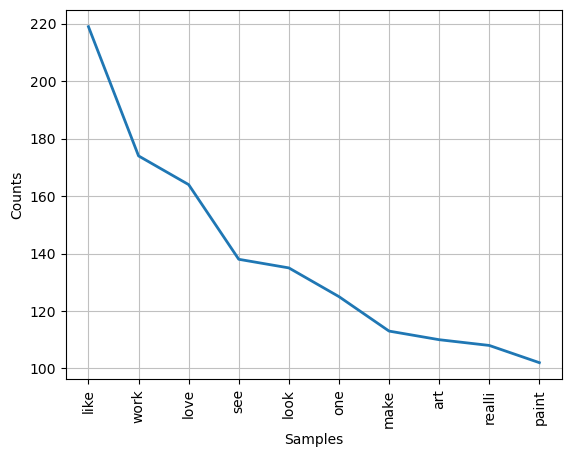

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [87]:
fd1 = nltk.FreqDist(tokens_stemmed1)
print(fd1.most_common(10))
fd1.plot(10)

[('like', 178), ('logo', 141), ('look', 127), ('design', 113), ('think', 82), ('http', 76), ('make', 70), ('one', 63), ('arrow', 60), ('would', 57)]


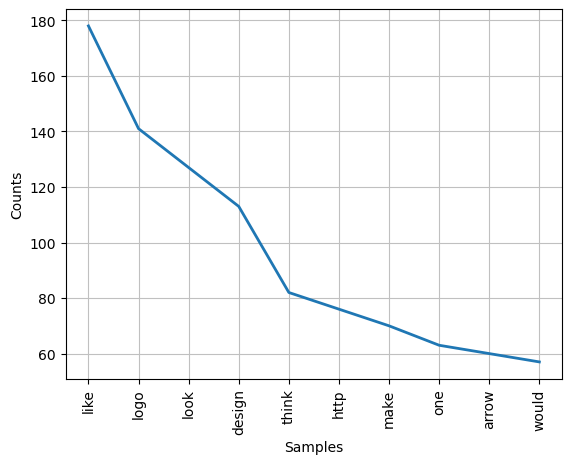

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [88]:
fd2 = nltk.FreqDist(tokens_stemmed2)
print(fd2.most_common(10))
fd2.plot(10)

[('game', 169), ('like', 133), ('play', 120), ('one', 94), ('get', 91), ('time', 62), ('guy', 55), ('go', 52), ('peopl', 48), ('year', 47)]


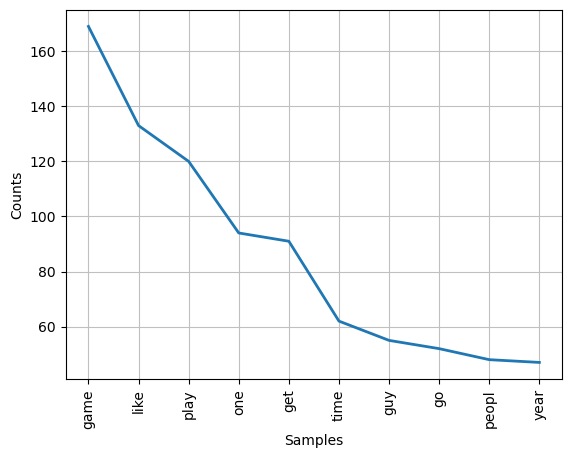

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [89]:
fd3 = nltk.FreqDist(tokens_stemmed3)
print(fd3.most_common(10))
fd3.plot(10)

[('game', 517), ('like', 206), ('look', 205), ('play', 160), ('get', 137), ('one', 128), ('time', 106), ('good', 103), ('ps4', 100), ('onlin', 100)]


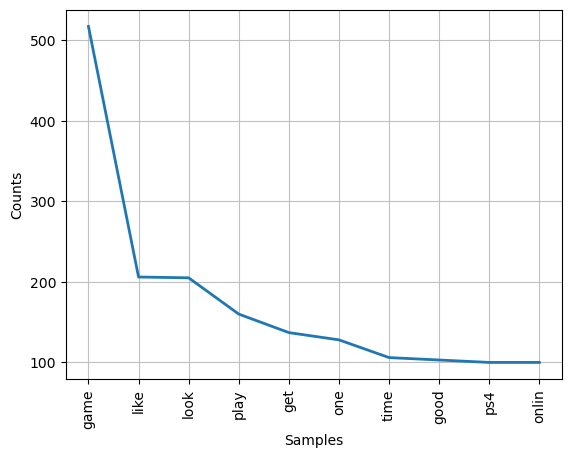

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [90]:
fd4 = nltk.FreqDist(tokens_stemmed4)
print(fd4.most_common(10))
fd4.plot(10)

[('american', 234), ('get', 176), ('us', 172), ('fuck', 159), ('go', 156), ('ireland', 149), ('like', 149), ('rent', 127), ('year', 124), ('peopl', 123)]


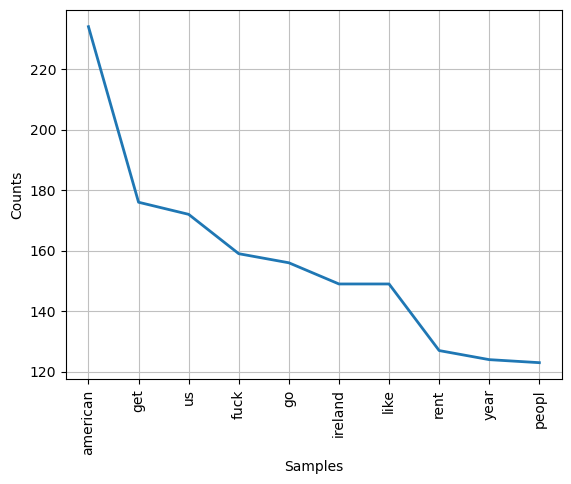

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [92]:
fd5 = nltk.FreqDist(tokens_stemmed5)
print(fd5.most_common(10))
fd5.plot(10)

[('look', 51), ('good', 32), ('england', 30), ('like', 26), ('great', 26), ('come', 24), ('fan', 23), ('see', 22), ('make', 19), ('realli', 19)]


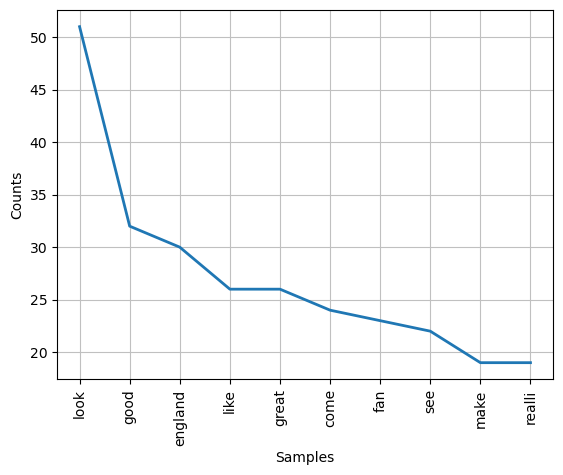

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [113]:
fd6 = nltk.FreqDist(tokens_stemmed6)
print(fd6.most_common(10))
fd6.plot(10)

[('remov', 213), ('student', 90), ('peopl', 87), ('get', 72), ('like', 71), ('tax', 64), ('would', 62), ('http', 60), ('one', 54), ('time', 54)]


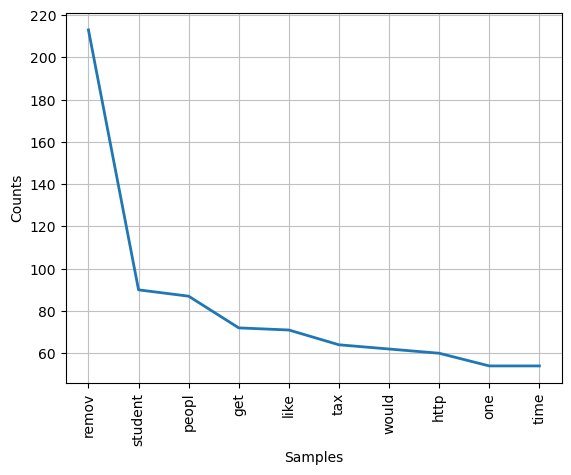

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [94]:
fd7 = nltk.FreqDist(tokens_stemmed7)
print(fd7.most_common(10))
fd7.plot(10)

[('peopl', 178), ('neutral', 177), ('net', 166), ('like', 164), ('internet', 122), ('http', 121), ('get', 120), ('fuck', 112), ('comcast', 106), ('would', 101)]


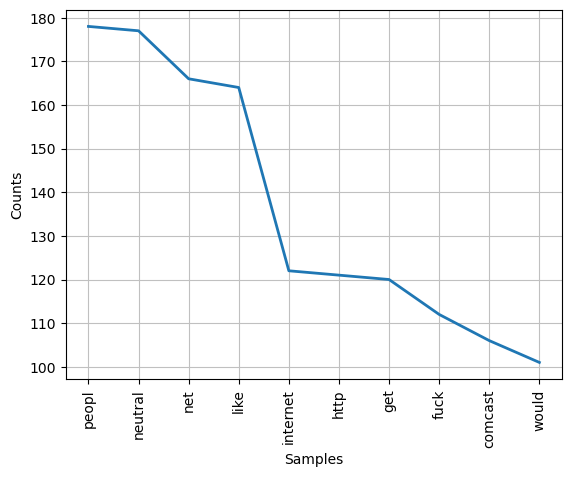

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [95]:
fd8 = nltk.FreqDist(tokens_stemmed8)
print(fd8.most_common(10))
fd8.plot(10)

### Tag all tokens with their parts of speech (POS)

In [114]:
pos_tokens1 = nltk.pos_tag(sub1_tokens)
pos_tokens1

[('artistic', 'JJ'),
 ('integrity', 'NN'),
 ('is', 'VBZ'),
 ('under', 'IN'),
 ('attack', 'NN'),
 (',', ','),
 ('me', 'PRP'),
 (',', ','),
 ('digital', 'NN'),
 (',', ','),
 ('2023', 'CD'),
 ('The', 'DT'),
 ('mods', 'NNS'),
 ('will', 'MD'),
 ('be', 'VB'),
 ('in', 'IN'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('busy', 'JJ'),
 ('few', 'JJ'),
 ('weeks', 'NNS'),
 ('then', 'RB'),
 ('Odd', 'NNP'),
 ('that', 'IN'),
 ('the', 'DT'),
 ('post', 'NN'),
 ('stays', 'NNS'),
 ('but', 'CC'),
 ('all', 'DT'),
 ('comments', 'NNS'),
 ('are', 'VBP'),
 ('nuked', 'VBN'),
 ('Getting', 'VBG'),
 ('banned', 'VBN'),
 ('from', 'IN'),
 ('r/art', 'NN'),
 ('speedrun', 'NN'),
 (',', ','),
 ('any', 'DT'),
 ('%', 'NN'),
 ('Making', 'NNP'),
 ('mistakes', 'NNS'),
 ('is', 'VBZ'),
 ('ok.', 'JJ'),
 ('After', 'IN'),
 ('all', 'DT'),
 ('we', 'PRP'),
 ("'re", 'VBP'),
 ('all', 'DT'),
 ('just', 'RB'),
 ('human', 'JJ'),
 ('(', '('),
 ('except', 'IN'),
 ('automoderators', 'NNS'),
 ('and', 'CC'),
 ('bots', 'NNS'),
 (')', ')'),
 ('.', '.'),
 ('B

In [115]:
pos_tokens2 = nltk.pos_tag(sub2_tokens)
pos_tokens2

[('The', 'DT'),
 ('new', 'JJ'),
 ('cover', 'NN'),
 ('of', 'IN'),
 ('TIME', 'NNP'),
 ('Needs', 'NNP'),
 ('to', 'TO'),
 ('have', 'VB'),
 ('one', 'CD'),
 ('of', 'IN'),
 ('those', 'DT'),
 ('singing', 'VBG'),
 ('card', 'JJ'),
 ('things', 'NNS'),
 ('in', 'IN'),
 ('it', 'PRP'),
 ('where', 'WRB'),
 ('it', 'PRP'),
 ('plays', 'VBZ'),
 ('the', 'DT'),
 ('Tetris', 'NNP'),
 ('theme', 'NN'),
 ('when', 'WRB'),
 ('you', 'PRP'),
 ('open', 'VBP'),
 ('the', 'DT'),
 ('cover', 'NN'),
 ('.', '.'),
 ('Great', 'NNP'),
 ('cover', 'NN'),
 (',', ','),
 ('but', 'CC'),
 ('I', 'PRP'),
 ('think', 'VBP'),
 ('it', 'PRP'),
 ('would', 'MD'),
 ("'ve", 'VBP'),
 ('been', 'VBN'),
 ('a', 'DT'),
 ('little', 'RB'),
 ('more', 'RBR'),
 ('symbolic', 'JJ'),
 ('if', 'IN'),
 ('the', 'DT'),
 ('curtains', 'NNS'),
 ('were', 'VBD'),
 ('closed', 'VBN'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('right', 'JJ'),
 ('side', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('white', 'JJ'),
 ('house', 'NN'),
 ('Who', 'WP'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('Illu

In [116]:
pos_tokens3 = nltk.pos_tag(sub3_tokens)
pos_tokens3

[('Take', 'VB'),
 ('your', 'PRP$'),
 ('time', 'NN'),
 (',', ','),
 ('you', 'PRP'),
 ('got', 'VBD'),
 ('this', 'DT'),
 ('Them', 'NN'),
 (':', ':'),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('think', 'VB'),
 ('I', 'PRP'),
 ('like', 'IN'),
 ('this', 'DT'),
 ('game', 'NN'),
 ('.', '.'),
 ('Me', 'NN'),
 (':', ':'),
 ('But', 'CC'),
 ('you', 'PRP'),
 ('have', 'VBP'),
 ("n't", 'RB'),
 ('even', 'RB'),
 ('played', 'VB'),
 ('it', 'PRP'),
 ('for', 'IN'),
 ('5', 'CD'),
 ('minutes', 'NNS'),
 ('and', 'CC'),
 ('are', 'VBP'),
 ('still', 'RB'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('tutorial', 'NN'),
 ('.', '.'),
 ('Then', 'RB'),
 ('you', 'PRP'),
 ('leave', 'VBP'),
 ('them', 'PRP'),
 ('to', 'TO'),
 ('farm', 'VB'),
 ('the', 'DT'),
 ('smaller', 'JJR'),
 ('creatures', 'NNS'),
 ('while', 'IN'),
 ('you', 'PRP'),
 ('either', 'VBP'),
 ('wait', 'VB'),
 ('or', 'CC'),
 ('help', 'VB'),
 ('them', 'PRP'),
 ('kill', 'VB'),
 ('them', 'PRP'),
 ('all', 'DT'),
 ('with', 'IN'),
 ('the', 'DT'),
 ('click', 'NN'),
 ('of', 

In [117]:
pos_tokens4 = nltk.pos_tag(sub4_tokens)
pos_tokens4

[('[', 'JJ'),
 ('Image', 'NNP'),
 (']', 'NNP'),
 ('got', 'VBD'),
 ('hit', 'VBN'),
 ('with', 'IN'),
 ('a', 'DT'),
 ('golf', 'NN'),
 ('ball', 'NN'),
 (',', ','),
 ('guy', 'NN'),
 ('that', 'IN'),
 ('hit', 'VBD'),
 ('me', 'PRP'),
 ('works', 'VBZ'),
 ('for', 'IN'),
 ('Sony', 'NNP'),
 ('.', '.'),
 ('He', 'PRP'),
 ('sent', 'VBD'),
 ('me', 'PRP'),
 ('this', 'DT'),
 ('care', 'NN'),
 ('package', 'NN'),
 ('[', 'VB'),
 ('Your', 'PRP$'),
 ('post', 'NN'),
 ('history', 'NN'),
 (']', 'NNP'),
 ('(', '('),
 ('https', 'NN'),
 (':', ':'),
 ('//i.imgur.com/t5SgEoq.jpg', 'NN'),
 (')', ')'),
 ('is', 'VBZ'),
 ('now', 'RB'),
 ('one', 'CD'),
 ('epic', 'NN'),
 ('saga', 'NN'),
 ('Peter', 'NNP'),
 ('rabbit', 'NN'),
 ('on', 'IN'),
 ('blu-ray', 'NN'),
 ('?', '.'),
 ('This', 'DT'),
 ('guys', 'VBZ'),
 ('not', 'RB'),
 ('fuckin', 'VBN'),
 ('around', 'IN'),
 ('Yet', 'RB'),
 ('no', 'DT'),
 ('PGA', 'NNP'),
 ('game', 'NN'),
 ('...', ':'),
 ('To', 'TO'),
 ('everyone', 'NN'),
 ('saying', 'VBG'),
 ('it', 'PRP'),
 ('’', 'NNP'),

In [118]:
pos_tokens5 = nltk.pos_tag(sub5_tokens)
pos_tokens5

[('The', 'DT'),
 ('President', 'NNP'),
 ('’', 'NNP'),
 ('s', 'VBD'),
 ('dog', 'NN'),
 (',', ','),
 ('Síoda', 'NNP'),
 (',', ','),
 ('has', 'VBZ'),
 ('passed', 'VBN'),
 ('away', 'RB'),
 ('.', '.'),
 ('RIP', 'NNP'),
 ('Síoda', 'NNP'),
 ('.', '.'),
 ('All', 'DT'),
 ('dogs', 'NNS'),
 ('go', 'VBP'),
 ('to', 'TO'),
 ('heaven', 'VB'),
 ('.', '.'),
 ('Rip', 'NNP'),
 ('State', 'NNP'),
 ('funeral', 'JJ'),
 ('I', 'PRP'),
 ('say', 'VBP'),
 ('I', 'PRP'),
 ('think', 'VBP'),
 ('we', 'PRP'),
 ('should', 'MD'),
 ('get', 'VB'),
 ('a', 'DT'),
 ('statue', 'NN'),
 ('of', 'IN'),
 ('this', 'DT'),
 ('dog', 'NN'),
 ('put', 'VBD'),
 ('into', 'IN'),
 ('Phoenix', 'NNP'),
 ('park', 'NN'),
 ('Ah', 'NNP'),
 ('bollocks', 'NNS'),
 (',', ','),
 ('fuck', 'NN'),
 ('you', 'PRP'),
 ('2020', 'CD'),
 ('.', '.'),
 ('A', 'DT'),
 ('once', 'RB'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('lifetime', 'NN'),
 ('dog', 'NN'),
 ('really', 'RB'),
 (',', ','),
 ('she', 'PRP'),
 ('just', 'RB'),
 ('stayed', 'VBD'),
 ('with', 'IN'),
 ('Miggled', 'NN

In [119]:
pos_tokens6 = nltk.pos_tag(sub6_tokens)
pos_tokens6

[('Greetings', 'NNS'),
 ('from', 'IN'),
 ('Saudi', 'NNP'),
 ('Arabia', 'NNP'),
 ('.', '.'),
 ('During', 'IN'),
 ('this', 'DT'),
 ('lock', 'VBZ'),
 ('down', 'RP'),
 ('I', 'PRP'),
 ('have', 'VBP'),
 ('decided', 'VBN'),
 ('to', 'TO'),
 ('make', 'VB'),
 ('150', 'CD'),
 ('dishes', 'NNS'),
 ('from', 'IN'),
 ('around', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('.', '.'),
 ('Behold', 'NN'),
 (':', ':'),
 ('Scones', 'NNS'),
 ('.', '.'),
 ('It', 'PRP'),
 ('’', 'VBD'),
 ('s', 'RB'),
 ('pronounced', 'VBN'),
 ('“', 'JJ'),
 ('scones', 'NNS'),
 ('!', '.'),
 ('”', 'NN'),
 ('I', 'PRP'),
 ('like', 'IN'),
 ('it', 'PRP'),
 ('!', '.'),
 ('Especially', 'RB'),
 ('how', 'WRB'),
 ('you', 'PRP'),
 ('sneakily', 'RB'),
 ('avoided', 'VBD'),
 ('conflict', 'NN'),
 ('by', 'IN'),
 ('not', 'RB'),
 ('putting', 'VBG'),
 ('the', 'DT'),
 ('jam', 'NN'),
 ('and', 'CC'),
 ('cream', 'NN'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('same', 'JJ'),
 ('scone', 'NN'),
 (',', ','),
 ('thus', 'RB'),
 ('avoiding', 'VBG'),
 ('the', 'DT'),
 ("'

In [120]:
pos_tokens7 = nltk.pos_tag(sub7_tokens)
pos_tokens7

[('Physicist', 'NN'),
 ('Stephen', 'NNP'),
 ('Hawking', 'NNP'),
 ('dies', 'VBZ'),
 ('aged', 'VBN'),
 ('76', 'CD'),
 ('We', 'PRP'),
 ('regret', 'VBP'),
 ('to', 'TO'),
 ('hear', 'VB'),
 ('that', 'IN'),
 ('[', 'JJ'),
 ('Stephen', 'NNP'),
 ('Hawking', 'NNP'),
 ('died', 'VBD'),
 ('tonight', 'NN'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('age', 'NN'),
 ('of', 'IN'),
 ('76', 'CD'),
 (']', 'NNS'),
 ('(', '('),
 ('http', 'NN'),
 (':', ':'),
 ('//www.bbc.com/news/uk-43396008', 'JJ'),
 (')', ')'),
 ('We', 'PRP'),
 ('are', 'VBP'),
 ('creating', 'VBG'),
 ('a', 'DT'),
 ('megathread', 'NN'),
 ('for', 'IN'),
 ('discussion', 'NN'),
 ('of', 'IN'),
 ('this', 'DT'),
 ('topic', 'NN'),
 ('here', 'RB'),
 ('.', '.'),
 ('The', 'DT'),
 ('typical', 'JJ'),
 ('/r/science', 'NN'),
 ('comment', 'NN'),
 ('rules', 'NNS'),
 ('will', 'MD'),
 ('not', 'RB'),
 ('apply', 'VB'),
 ('and', 'CC'),
 ('we', 'PRP'),
 ('will', 'MD'),
 ('allow', 'VB'),
 ('mature', 'NN'),
 (',', ','),
 ('open', 'JJ'),
 ('discussion', 'NN'),
 ('.', '.'),
 ('

In [121]:
pos_tokens8 = nltk.pos_tag(sub8_tokens)
pos_tokens8

[('Reddit', 'NNP'),
 ('bans', 'NNS'),
 ('subreddit', 'VBP'),
 ('group', 'NN'),
 ('``', '``'),
 ('r/DonaldTrump', 'NN'),
 ("''", "''"),
 ('Only', 'RB'),
 ('because', 'IN'),
 ('Reddit', 'NNP'),
 ('is', 'VBZ'),
 ('being', 'VBG'),
 ('mentioned', 'VBN'),
 ('by', 'IN'),
 ('politicians', 'NNS'),
 ('.', '.'),
 ('So', 'IN'),
 ('they', 'PRP'),
 ('will', 'MD'),
 ('move', 'VB'),
 ('to', 'TO'),
 ('r/TheDon', 'VB'),
 ('or', 'CC'),
 ('r/therealdonaldjtrump', 'VB'),
 ('Whack', 'WRB'),
 ('a', 'DT'),
 ('mole', 'JJ'),
 ('How', 'WRB'),
 ('about', 'RB'),
 ('enabling', 'VBG'),
 ('users', 'NNS'),
 ('to', 'TO'),
 ('block', 'VB'),
 ('shitty', 'JJ'),
 ('subreddits', 'NNS'),
 ('they', 'PRP'),
 ('don', 'VBP'),
 ('’', 'JJ'),
 ('t', 'NN'),
 ('want', 'VBP'),
 ('to', 'TO'),
 ('see', 'VB'),
 ('in', 'IN'),
 ('/popular', 'JJ'),
 ('?', '.'),
 ('Meanwhile', 'RB'),
 (',', ','),
 ('Twitter', 'NNP'),
 ('would', 'MD'),
 ('like', 'VB'),
 ('to', 'TO'),
 ('remind', 'VB'),
 ('its', 'PRP$'),
 ('users', 'NNS'),
 ('that', 'IN'),
 ('

### most common adj and noun

In [136]:
from collections import Counter
import matplotlib.pyplot as plt

In [152]:
pt_new = [x for x in pos_tokens1 if (x[1]=='JJ')]

In [153]:
res = Counter(pt_new)
dict ={}
for i,j in res.items():
    dict[i]=j

In [154]:
dict_sort = sorted(dict.items(),key=lambda x:x[1],reverse=True)

In [155]:
dict_sort20 =dict_sort[0:20]  

In [156]:
print(dict_sort20)

[(('amazing', 'JJ'), 52), (('good', 'JJ'), 48), (('great', 'JJ'), 47), (('cool', 'JJ'), 45), (('beautiful', 'JJ'), 42), (('awesome', 'JJ'), 39), (('’', 'JJ'), 35), (('much', 'JJ'), 35), (('incredible', 'JJ'), 29), (('original', 'JJ'), 28), (('many', 'JJ'), 28), (('hard', 'JJ'), 22), (('same', 'JJ'), 22), (('new', 'JJ'), 22), (('sure', 'JJ'), 21), (('other', 'JJ'), 21), (('old', 'JJ'), 21), (('first', 'JJ'), 20), (('perfect', 'JJ'), 19), (('creative', 'JJ'), 19)]


In [163]:
pt_new2 = [x for x in pos_tokens1 if (x[1]=='NN')]
res2 = Counter(pt_new2)
dict2 ={}
for i,j in res2.items():
    dict2[i]=j
dict2_sort = sorted(dict2.items(),key=lambda x:x[1],reverse=True)
dict2_sort20 =dict2_sort[0:20] 

In [164]:
print(dict2_sort20)

[(('work', 'NN'), 145), (('art', 'NN'), 84), (('moon', 'NN'), 58), (('picture', 'NN'), 53), (('time', 'NN'), 46), (('piece', 'NN'), 46), (('something', 'NN'), 45), (('job', 'NN'), 42), (('https', 'NN'), 41), (('man', 'NN'), 39), (('way', 'NN'), 38), (('life', 'NN'), 36), (('van', 'NN'), 36), (('t', 'NN'), 32), (('image', 'NN'), 31), (('post', 'NN'), 29), (('thing', 'NN'), 28), (('painting', 'NN'), 28), (('paper', 'NN'), 28), (('martini', 'NN'), 25)]


In [179]:
pt_new = [x for x in pos_tokens2 if (x[1]=='JJ')]
res = Counter(pt_new)
dict ={}
for i,j in res.items():
    dict[i]=j
dict_sort = sorted(dict.items(),key=lambda x:x[1],reverse=True)  
dict_sort20 =dict_sort[0:20]  
print(dict_sort20)

[(('red', 'JJ'), 32), (('original', 'JJ'), 29), (('great', 'JJ'), 28), (('good', 'JJ'), 28), (('white', 'JJ'), 23), (('nice', 'JJ'), 21), (('right', 'JJ'), 19), (('much', 'JJ'), 16), (('whole', 'JJ'), 15), (('other', 'JJ'), 15), (('*', 'JJ'), 15), (('first', 'JJ'), 15), (('current', 'JJ'), 13), (('new', 'JJ'), 12), (('political', 'JJ'), 12), (('little', 'JJ'), 12), ((']', 'JJ'), 11), (('beautiful', 'JJ'), 11), (('bad', 'JJ'), 11), (('logo', 'JJ'), 11)]


In [180]:
pt_new2 = [x for x in pos_tokens2 if (x[1]=='NN')]
res2 = Counter(pt_new2)
dict2 ={}
for i,j in res2.items():
    dict2[i]=j
dict2_sort = sorted(dict2.items(),key=lambda x:x[1],reverse=True)
dict2_sort20 =dict2_sort[0:20] 
print(dict2_sort20)

[(('logo', 'NN'), 110), (('design', 'NN'), 73), (('arrow', 'NN'), 54), (('https', 'NN'), 39), (('[', 'NN'), 33), (('http', 'NN'), 29), (('color', 'NN'), 25), (('time', 'NN'), 25), (('plastic', 'NN'), 24), (('space', 'NN'), 21), (('cover', 'NN'), 20), ((']', 'NN'), 20), (('work', 'NN'), 20), (('idea', 'NN'), 19), (('way', 'NN'), 19), (('something', 'NN'), 19), (('box', 'NN'), 19), (('campaign', 'NN'), 18), (('thing', 'NN'), 17), (('%', 'NN'), 16)]


In [167]:
pt_new = [x for x in pos_tokens3 if (x[1]=='JJ')]
res = Counter(pt_new)
dict ={}
for i,j in res.items():
    dict[i]=j
dict_sort = sorted(dict.items(),key=lambda x:x[1],reverse=True)  
dict_sort20 =dict_sort[0:20]  
print(dict_sort20)

[(('good', 'JJ'), 29), (('’', 'JJ'), 26), (('last', 'JJ'), 24), (('first', 'JJ'), 22), (('great', 'JJ'), 20), (('other', 'JJ'), 19), (('much', 'JJ'), 18), (('many', 'JJ'), 18), (('old', 'JJ'), 17), (('bad', 'JJ'), 16), (('few', 'JJ'), 16), (('[', 'JJ'), 13), (('little', 'JJ'), 13), (('new', 'JJ'), 13), (('same', 'JJ'), 13), (('next', 'JJ'), 13), (('*', 'JJ'), 13), (('only', 'JJ'), 12), (('s', 'JJ'), 10), (('sure', 'JJ'), 10)]


In [168]:
pt_new2 = [x for x in pos_tokens3 if (x[1]=='NN')]
res2 = Counter(pt_new2)
dict2 ={}
for i,j in res2.items():
    dict2[i]=j
dict2_sort = sorted(dict2.items(),key=lambda x:x[1],reverse=True)
dict2_sort20 =dict2_sort[0:20] 
print(dict2_sort20)

[(('game', 'NN'), 96), (('time', 'NN'), 50), (('https', 'NN'), 40), (('thing', 'NN'), 31), (('day', 'NN'), 29), (('t', 'NN'), 26), (('guy', 'NN'), 26), (('something', 'NN'), 23), (('way', 'NN'), 22), (('one', 'NN'), 22), (('r/watchredditdie', 'NN'), 21), (('horse', 'NN'), 20), (('[', 'NN'), 19), (('man', 'NN'), 19), (('controller', 'NN'), 19), (('year', 'NN'), 18), (('life', 'NN'), 18), (('girl', 'NN'), 17), (('*', 'NN'), 16), (('i', 'NN'), 16)]


In [169]:
pt_new = [x for x in pos_tokens4 if (x[1]=='JJ')]
res = Counter(pt_new)
dict ={}
for i,j in res.items():
    dict[i]=j
dict_sort = sorted(dict.items(),key=lambda x:x[1],reverse=True)  
dict_sort20 =dict_sort[0:20]  
print(dict_sort20)

[(('good', 'JJ'), 81), (('great', 'JJ'), 55), (('single', 'JJ'), 49), (('’', 'JJ'), 44), (('online', 'JJ'), 37), (('other', 'JJ'), 34), (('same', 'JJ'), 34), (('last', 'JJ'), 31), (('many', 'JJ'), 30), (('much', 'JJ'), 30), (('new', 'JJ'), 28), (('whole', 'JJ'), 27), (('first', 'JJ'), 27), (('amazing', 'JJ'), 26), (('s', 'JJ'), 25), (('old', 'JJ'), 25), (('next', 'JJ'), 24), (('nice', 'JJ'), 22), (('digital', 'JJ'), 22), (('awesome', 'JJ'), 21)]


In [170]:
pt_new2 = [x for x in pos_tokens4 if (x[1]=='NN')]
res2 = Counter(pt_new2)
dict2 ={}
for i,j in res2.items():
    dict2[i]=j
dict2_sort = sorted(dict2.items(),key=lambda x:x[1],reverse=True)
dict2_sort20 =dict2_sort[0:20] 
print(dict2_sort20)

[(('game', 'NN'), 284), (('time', 'NN'), 87), (('player', 'NN'), 54), (('thing', 'NN'), 52), (('cosplay', 'NN'), 48), (('t', 'NN'), 46), (('way', 'NN'), 42), (('job', 'NN'), 36), (('online', 'NN'), 36), (('i', 'NN'), 33), (('https', 'NN'), 32), (('shit', 'NN'), 31), (('golf', 'NN'), 30), (('s', 'NN'), 30), (('gen', 'NN'), 30), (('refund', 'NN'), 29), (('lot', 'NN'), 28), (('ps4', 'NN'), 27), (('one', 'NN'), 27), (('guy', 'NN'), 25)]


In [171]:
pt_new = [x for x in pos_tokens5 if (x[1]=='JJ')]
res = Counter(pt_new)
dict ={}
for i,j in res.items():
    dict[i]=j
dict_sort = sorted(dict.items(),key=lambda x:x[1],reverse=True)  
dict_sort20 =dict_sort[0:20]  
print(dict_sort20)

[(('American', 'JJ'), 129), (('’', 'JJ'), 76), (('other', 'JJ'), 53), (('good', 'JJ'), 51), (('Irish', 'JJ'), 41), (('same', 'JJ'), 40), (('much', 'JJ'), 39), (('last', 'JJ'), 37), (('s', 'JJ'), 36), (('few', 'JJ'), 33), (('great', 'JJ'), 30), (('first', 'JJ'), 26), (('bad', 'JJ'), 24), (('new', 'JJ'), 24), (('sad', 'JJ'), 23), (('old', 'JJ'), 21), (('next', 'JJ'), 21), (('many', 'JJ'), 21), (('safe', 'JJ'), 20), (('English', 'JJ'), 20)]


In [172]:
pt_new2 = [x for x in pos_tokens5 if (x[1]=='NN')]
res2 = Counter(pt_new2)
dict2 ={}
for i,j in res2.items():
    dict2[i]=j
dict2_sort = sorted(dict2.items(),key=lambda x:x[1],reverse=True)
dict2_sort20 =dict2_sort[0:20] 
print(dict2_sort20)

[(('deposit', 'NN'), 104), (('country', 'NN'), 86), (('house', 'NN'), 83), (('t', 'NN'), 79), (('rent', 'NN'), 65), (('mortgage', 'NN'), 64), (('time', 'NN'), 63), (('year', 'NN'), 52), (('home', 'NN'), 51), (('day', 'NN'), 49), (('money', 'NN'), 46), (('month', 'NN'), 44), (('world', 'NN'), 43), (('dog', 'NN'), 40), (('shit', 'NN'), 38), (('https', 'NN'), 37), (('place', 'NN'), 37), (('something', 'NN'), 36), (('landlord', 'NN'), 36), (('thing', 'NN'), 35)]


In [173]:
pt_new = [x for x in pos_tokens6 if (x[1]=='JJ')]
res = Counter(pt_new)
dict ={}
for i,j in res.items():
    dict[i]=j
dict_sort = sorted(dict.items(),key=lambda x:x[1],reverse=True)  
dict_sort20 =dict_sort[0:20]  
print(dict_sort20)

[(('great', 'JJ'), 23), (('good', 'JJ'), 18), (('Good', 'JJ'), 11), (('other', 'JJ'), 10), (('next', 'JJ'), 9), (('Italian', 'JJ'), 7), (('English', 'JJ'), 6), (('m', 'JJ'), 6), (('nice', 'JJ'), 6), (('bad', 'JJ'), 6), (('’', 'JJ'), 6), (('same', 'JJ'), 5), (('first', 'JJ'), 5), (('s', 'JJ'), 5), (('fantastic', 'JJ'), 4), (('American', 'JJ'), 4), (('second', 'JJ'), 4), (('[', 'JJ'), 4), (('national', 'JJ'), 4), (('hungry', 'JJ'), 3)]


In [174]:
pt_new2 = [x for x in pos_tokens6 if (x[1]=='NN')]
res2 = Counter(pt_new2)
dict2 ={}
for i,j in res2.items():
    dict2[i]=j
dict2_sort = sorted(dict2.items(),key=lambda x:x[1],reverse=True)
dict2_sort20 =dict2_sort[0:20] 
print(dict2_sort20)

[(('team', 'NN'), 15), (('cream', 'NN'), 14), (('game', 'NN'), 13), (('https', 'NN'), 11), (('home', 'NN'), 11), (('way', 'NN'), 10), (('jam', 'NN'), 9), (('time', 'NN'), 9), (('work', 'NN'), 9), (('lot', 'NN'), 9), (('effort', 'NN'), 8), (('t', 'NN'), 8), (('job', 'NN'), 7), (('match', 'NN'), 7), (('[', 'NN'), 6), (('thing', 'NN'), 6), (('football', 'NN'), 6), (('world', 'NN'), 5), (('point', 'NN'), 5), (('recipe', 'NN'), 4)]


In [175]:
pt_new = [x for x in pos_tokens7 if (x[1]=='JJ')]
res = Counter(pt_new)
dict ={}
for i,j in res.items():
    dict[i]=j
dict_sort = sorted(dict.items(),key=lambda x:x[1],reverse=True)  
dict_sort20 =dict_sort[0:20]  
print(dict_sort20)

[(('black', 'JJ'), 38), (('much', 'JJ'), 27), (('other', 'JJ'), 27), ((']', 'JJ'), 23), (('good', 'JJ'), 22), (('*', 'JJ'), 22), (('great', 'JJ'), 20), (('many', 'JJ'), 19), (('own', 'JJ'), 19), (('’', 'JJ'), 18), (('[', 'JJ'), 17), (('grad', 'JJ'), 17), (('young', 'JJ'), 16), (('violent', 'JJ'), 16), (('few', 'JJ'), 15), (('first', 'JJ'), 15), (('able', 'JJ'), 13), (('new', 'JJ'), 13), (('attractive', 'JJ'), 13), (('hard', 'JJ'), 12)]


In [176]:
pt_new2 = [x for x in pos_tokens7 if (x[1]=='NN')]
res2 = Counter(pt_new2)
dict2 ={}
for i,j in res2.items():
    dict2[i]=j
dict2_sort = sorted(dict2.items(),key=lambda x:x[1],reverse=True)
dict2_sort20 =dict2_sort[0:20] 
print(dict2_sort20)

[(('https', 'NN'), 48), (('%', 'NN'), 43), (('time', 'NN'), 39), (('*', 'NN'), 36), (('hole', 'NN'), 34), (('tuition', 'NN'), 33), (('tax', 'NN'), 30), (('study', 'NN'), 30), (('student', 'NN'), 29), (('[', 'NN'), 27), ((']', 'NN'), 26), (('air', 'NN'), 26), (('life', 'NN'), 25), (('science', 'NN'), 24), (('way', 'NN'), 23), (('research', 'NN'), 22), (('lot', 'NN'), 20), (('system', 'NN'), 19), (('money', 'NN'), 19), (('class', 'NN'), 19)]


In [177]:
pt_new = [x for x in pos_tokens8 if (x[1]=='JJ')]
res = Counter(pt_new)
dict ={}
for i,j in res.items():
    dict[i]=j
dict_sort = sorted(dict.items(),key=lambda x:x[1],reverse=True)  
dict_sort20 =dict_sort[0:20]  
print(dict_sort20)

[(('net', 'JJ'), 117), (('*', 'JJ'), 52), (('other', 'JJ'), 45), (('good', 'JJ'), 44), (('free', 'JJ'), 37), (('Net', 'JJ'), 33), (('’', 'JJ'), 32), (('American', 'JJ'), 31), (('much', 'JJ'), 29), (('many', 'JJ'), 27), (('same', 'JJ'), 26), (('bad', 'JJ'), 25), (('[', 'JJ'), 23), (('Russian', 'JJ'), 23), (('public', 'JJ'), 22), (('s', 'JJ'), 22), (('new', 'JJ'), 22), (('legal', 'JJ'), 22), (('own', 'JJ'), 20), (('real', 'JJ'), 19)]


In [178]:
pt_new2 = [x for x in pos_tokens8 if (x[1]=='NN')]
res2 = Counter(pt_new2)
dict2 ={}
for i,j in res2.items():
    dict2[i]=j
dict2_sort = sorted(dict2.items(),key=lambda x:x[1],reverse=True)
dict2_sort20 =dict2_sort[0:20] 
print(dict2_sort20)

[(('neutrality', 'NN'), 138), (('https', 'NN'), 94), (('internet', 'NN'), 85), (('name', 'NN'), 66), (('time', 'NN'), 63), (('%', 'NN'), 57), (('company', 'NN'), 50), (('site', 'NN'), 50), (('government', 'NN'), 49), (('thing', 'NN'), 48), (('way', 'NN'), 48), (('something', 'NN'), 42), (('domain', 'NN'), 42), (('world', 'NN'), 39), (('anything', 'NN'), 37), (('shit', 'NN'), 37), (('t', 'NN'), 36), (('[', 'NN'), 36), (('bill', 'NN'), 36), (('money', 'NN'), 35)]


### Named Entity Recognition (NER)

In [122]:
ne_tree1 = ne_chunk(pos_tokens1)
print(ne_tree1)

(S
  artistic/JJ
  integrity/NN
  is/VBZ
  under/IN
  attack/NN
  ,/,
  me/PRP
  ,/,
  digital/NN
  ,/,
  2023/CD
  The/DT
  mods/NNS
  will/MD
  be/VB
  in/IN
  for/IN
  a/DT
  busy/JJ
  few/JJ
  weeks/NNS
  then/RB
  Odd/NNP
  that/IN
  the/DT
  post/NN
  stays/NNS
  but/CC
  all/DT
  comments/NNS
  are/VBP
  nuked/VBN
  Getting/VBG
  banned/VBN
  from/IN
  r/art/NN
  speedrun/NN
  ,/,
  any/DT
  %/NN
  Making/NNP
  mistakes/NNS
  is/VBZ
  ok./JJ
  After/IN
  all/DT
  we/PRP
  're/VBP
  all/DT
  just/RB
  human/JJ
  (/(
  except/IN
  automoderators/NNS
  and/CC
  bots/NNS
  )/)
  ./.
  But/CC
  failing/VBG
  to/TO
  admit/VB
  mistakes/NNS
  and/CC
  behave/VBP
  like/IN
  a/DT
  powertripping/NN
  teenager/NN
  is/VBZ
  not/RB
  ok./JJ
  Dear/NNP
  mods/NNS
  ,/,
  grow/VB
  up/RP
  ,/,
  admit/VB
  your/PRP$
  mistake/NN
  ,/,
  apologize/VB
  and/CC
  be/VB
  more/JJR
  careful/JJ
  and/CC
  professional/JJ
  next/JJ
  time/NN
  ./.
  Thank/NNP
  you/PRP
  ./.
  If/IN
  you/PRP
  

In [123]:
ne_tree2 = ne_chunk(pos_tokens2)
print(ne_tree2)

(S
  The/DT
  new/JJ
  cover/NN
  of/IN
  (ORGANIZATION TIME/NNP Needs/NNP)
  to/TO
  have/VB
  one/CD
  of/IN
  those/DT
  singing/VBG
  card/JJ
  things/NNS
  in/IN
  it/PRP
  where/WRB
  it/PRP
  plays/VBZ
  the/DT
  (GPE Tetris/NNP)
  theme/NN
  when/WRB
  you/PRP
  open/VBP
  the/DT
  cover/NN
  ./.
  (GPE Great/NNP)
  cover/NN
  ,/,
  but/CC
  I/PRP
  think/VBP
  it/PRP
  would/MD
  've/VBP
  been/VBN
  a/DT
  little/RB
  more/RBR
  symbolic/JJ
  if/IN
  the/DT
  curtains/NNS
  were/VBD
  closed/VBN
  on/IN
  the/DT
  right/JJ
  side/NN
  of/IN
  the/DT
  white/JJ
  house/NN
  Who/WP
  is/VBZ
  the/DT
  Illustrator/NNP
  ?/.
  This/DT
  is/VBZ
  very/RB
  (GPE New/NNP Yorker/NNP)
  ./.
  Time/NNP
  covers/VBZ
  usually/RB
  look/VBP
  like/IN
  clickbaity/NN
  ``/``
  this/DT
  is/VBZ
  THE/NNP
  issue/NN
  on/IN
  whatever/WDT
  ''/''
  ``/``
  also/RB
  it/PRP
  's/VBZ
  a/DT
  collectors/NNS
  edition/NN
  and/CC
  also/RB
  here/RB
  's/VBZ
  the/DT
  photo/NN
  of/IN
  the/D

In [124]:
ne_tree3 = ne_chunk(pos_tokens3)
print(ne_tree3)

(S
  Take/VB
  your/PRP$
  time/NN
  ,/,
  you/PRP
  got/VBD
  this/DT
  Them/NN
  :/:
  I/PRP
  do/VBP
  n't/RB
  think/VB
  I/PRP
  like/IN
  this/DT
  game/NN
  ./.
  Me/NN
  :/:
  But/CC
  you/PRP
  have/VBP
  n't/RB
  even/RB
  played/VB
  it/PRP
  for/IN
  5/CD
  minutes/NNS
  and/CC
  are/VBP
  still/RB
  in/IN
  the/DT
  tutorial/NN
  ./.
  Then/RB
  you/PRP
  leave/VBP
  them/PRP
  to/TO
  farm/VB
  the/DT
  smaller/JJR
  creatures/NNS
  while/IN
  you/PRP
  either/VBP
  wait/VB
  or/CC
  help/VB
  them/PRP
  kill/VB
  them/PRP
  all/DT
  with/IN
  the/DT
  click/NN
  of/IN
  a/DT
  button/NN
  ./.
  Nothing/NN
  beats/VBZ
  the/DT
  feeling/NN
  you/PRP
  get/VBP
  when/WRB
  you/PRP
  see/VBP
  them/PRP
  fall/VB
  in/IN
  love/NN
  with/IN
  it/PRP
  just/RB
  like/IN
  you/PRP
  did/VBD
  all/PDT
  those/DT
  years/NNS
  ago/RB
  [/NNP
  Also/RB
  ,/,
  they/PRP
  're/VBP
  made/VBN
  of/IN
  paper/NN
  ]/NNP
  (/(
  https/NN
  :/:
  //i.imgur.com/wYu0G9J.jpg/NN
  )/)
  Ed

In [125]:
ne_tree4 = ne_chunk(pos_tokens4)
print(ne_tree4)

(S
  [/JJ
  Image/NNP
  ]/NNP
  got/VBD
  hit/VBN
  with/IN
  a/DT
  golf/NN
  ball/NN
  ,/,
  guy/NN
  that/IN
  hit/VBD
  me/PRP
  works/VBZ
  for/IN
  (PERSON Sony/NNP)
  ./.
  He/PRP
  sent/VBD
  me/PRP
  this/DT
  care/NN
  package/NN
  [/VB
  Your/PRP$
  post/NN
  history/NN
  ]/NNP
  (/(
  https/NN
  :/:
  //i.imgur.com/t5SgEoq.jpg/NN
  )/)
  is/VBZ
  now/RB
  one/CD
  epic/NN
  saga/NN
  (PERSON Peter/NNP)
  rabbit/NN
  on/IN
  blu-ray/NN
  ?/.
  This/DT
  guys/VBZ
  not/RB
  fuckin/VBN
  around/IN
  Yet/RB
  no/DT
  PGA/NNP
  game/NN
  .../:
  To/TO
  everyone/NN
  saying/VBG
  it/PRP
  ’/NNP
  s/VBD
  a/DT
  “/JJ
  don/NN
  ’/NNP
  t/NN
  sue/NN
  me/PRP
  ”/JJ
  package/NN
  -/:
  this/DT
  isn/JJ
  ’/NNP
  t/NN
  really/RB
  an/DT
  instance/NN
  where/WRB
  I/PRP
  could/MD
  sue/VB
  even/RB
  if/IN
  I/PRP
  wanted/VBD
  to/TO
  ./.
  With/IN
  any/DT
  spectator/NN
  sports/NNS
  you/PRP
  assume/VBP
  liability/NN
  once/RB
  you/PRP
  ’/VBP
  re/VB
  on/IN
  the/DT
  

In [126]:
ne_tree5 = ne_chunk(pos_tokens5)
print(ne_tree5)

(S
  The/DT
  President/NNP
  ’/NNP
  s/VBD
  dog/NN
  ,/,
  (PERSON Síoda/NNP)
  ,/,
  has/VBZ
  passed/VBN
  away/RB
  ./.
  (ORGANIZATION RIP/NNP Síoda/NNP)
  ./.
  All/DT
  dogs/NNS
  go/VBP
  to/TO
  heaven/VB
  ./.
  (PERSON Rip/NNP State/NNP)
  funeral/JJ
  I/PRP
  say/VBP
  I/PRP
  think/VBP
  we/PRP
  should/MD
  get/VB
  a/DT
  statue/NN
  of/IN
  this/DT
  dog/NN
  put/VBD
  into/IN
  (GPE Phoenix/NNP)
  park/NN
  Ah/NNP
  bollocks/NNS
  ,/,
  fuck/NN
  you/PRP
  2020/CD
  ./.
  A/DT
  once/RB
  in/IN
  a/DT
  lifetime/NN
  dog/NN
  really/RB
  ,/,
  she/PRP
  just/RB
  stayed/VBD
  with/IN
  (PERSON Miggled/NNP)
  all/PDT
  the/DT
  time/NN
  be/VB
  it/PRP
  in/IN
  a/DT
  big/JJ
  event/NN
  or/CC
  just/RB
  hanging/VBG
  out/RP
  ./.
  (GPE Great/NNP)
  dog/NN
  ./.
  Now/RB
  to/TO
  go/VB
  chase/VB
  some/DT
  postmen/NNS
  in/IN
  heaven/NN
  ./.
  There/EX
  's/VBZ
  17,000/CD
  people/NNS
  in/IN
  this/DT
  subreddit/NN
  now/RB
  Do/VBP
  I/PRP
  put/VB
  out/RP

In [127]:
ne_tree6 = ne_chunk(pos_tokens6)
print(ne_tree6)

(S
  Greetings/NNS
  from/IN
  (GPE Saudi/NNP Arabia/NNP)
  ./.
  During/IN
  this/DT
  lock/VBZ
  down/RP
  I/PRP
  have/VBP
  decided/VBN
  to/TO
  make/VB
  150/CD
  dishes/NNS
  from/IN
  around/IN
  the/DT
  world/NN
  ./.
  (PERSON Behold/NN)
  :/:
  Scones/NNS
  ./.
  It/PRP
  ’/VBD
  s/RB
  pronounced/VBN
  “/JJ
  scones/NNS
  !/.
  ”/NN
  I/PRP
  like/IN
  it/PRP
  !/.
  Especially/RB
  how/WRB
  you/PRP
  sneakily/RB
  avoided/VBD
  conflict/NN
  by/IN
  not/RB
  putting/VBG
  the/DT
  jam/NN
  and/CC
  cream/NN
  on/IN
  the/DT
  same/JJ
  scone/NN
  ,/,
  thus/RB
  avoiding/VBG
  the/DT
  'which/CD
  comes/VBZ
  first/RB
  '/JJ
  debate/NN
  ./.
  really/RB
  ,/,
  really/RB
  good/JJ
  --/:
  --/:
  --/:
  --/:
  --/:
  --/:
  --/:
  --/:
  -well/VBP
  done/VBN
  (PERSON Fun/NNP)
  fact/NN
  ,/,
  it/PRP
  's/VBZ
  the/DT
  fastest/JJS
  cake/NN
  in/IN
  the/DT
  world/NN
  ./.
  You/PRP
  have/VBP
  done/VBN
  this/DT
  nation/NN
  proud/NN
  ./.
  Now/RB
  eat/VBZ
  the

In [128]:
ne_tree7 = ne_chunk(pos_tokens7)
print(ne_tree7)

(S
  (PERSON Physicist/NN)
  (PERSON Stephen/NNP Hawking/NNP)
  dies/VBZ
  aged/VBN
  76/CD
  We/PRP
  regret/VBP
  to/TO
  hear/VB
  that/IN
  [/JJ
  (PERSON Stephen/NNP Hawking/NNP)
  died/VBD
  tonight/NN
  at/IN
  the/DT
  age/NN
  of/IN
  76/CD
  ]/NNS
  (/(
  http/NN
  :/:
  //www.bbc.com/news/uk-43396008/JJ
  )/)
  We/PRP
  are/VBP
  creating/VBG
  a/DT
  megathread/NN
  for/IN
  discussion/NN
  of/IN
  this/DT
  topic/NN
  here/RB
  ./.
  The/DT
  typical/JJ
  /r/science/NN
  comment/NN
  rules/NNS
  will/MD
  not/RB
  apply/VB
  and/CC
  we/PRP
  will/MD
  allow/VB
  mature/NN
  ,/,
  open/JJ
  discussion/NN
  ./.
  This/DT
  post/NN
  may/MD
  be/VB
  updated/VBN
  as/IN
  we/PRP
  are/VBP
  able/JJ
  ./.
  A/DT
  few/JJ
  relevant/JJ
  links/NNS
  :/:
  [/NN
  (PERSON Stephen/NNP Hawking/NNP)
  's/POS
  (ORGANIZATION AMA/NNP)
  on/IN
  /r/science/NN
  ]/NN
  (/(
  https/NN
  :/:
  //www.reddit.com/r/science/comments/3nyn5i/science_ama_series_stephen_hawking_ama_answers//NN
 

In [129]:
ne_tree8 = ne_chunk(pos_tokens8)
print(ne_tree8)

(S
  (GPE Reddit/NNP)
  bans/NNS
  subreddit/VBP
  group/NN
  ``/``
  r/DonaldTrump/NN
  ''/''
  Only/RB
  because/IN
  (ORGANIZATION Reddit/NNP)
  is/VBZ
  being/VBG
  mentioned/VBN
  by/IN
  politicians/NNS
  ./.
  So/IN
  they/PRP
  will/MD
  move/VB
  to/TO
  r/TheDon/VB
  or/CC
  r/therealdonaldjtrump/VB
  Whack/WRB
  a/DT
  mole/JJ
  How/WRB
  about/RB
  enabling/VBG
  users/NNS
  to/TO
  block/VB
  shitty/JJ
  subreddits/NNS
  they/PRP
  don/VBP
  ’/JJ
  t/NN
  want/VBP
  to/TO
  see/VB
  in/IN
  /popular/JJ
  ?/.
  Meanwhile/RB
  ,/,
  (PERSON Twitter/NNP)
  would/MD
  like/VB
  to/TO
  remind/VB
  its/PRP$
  users/NNS
  that/IN
  advocating/VBG
  for/IN
  a/DT
  violent/JJ
  insurrection/NN
  that/WDT
  results/NNS
  in/IN
  security/NN
  breaches/NNS
  ,/,
  injuries/NNS
  ,/,
  and/CC
  deaths/NNS
  will/MD
  result/VB
  in/IN
  a/DT
  temporary/JJ
  ban/NN
  of/IN
  half/PDT
  an/DT
  hour/NN
  starting/VBG
  at/IN
  3/CD
  AM/NNP
  on/IN
  a/DT
  Saturday/NNP
  ,/,
  altho